<a href="https://colab.research.google.com/github/AdarshJha5/Openplay-Assignment-2/blob/main/Openplay_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the Dataset

In [41]:
data = pd.read_csv('/content/Final Dataset.csv')

#EDA - Exploratory Data Analysis
To begin with, we will perform some data cleaning and Exploratory Data Analysis (EDA) on the provided dataset using Python. This will help us understand the data better and identify any potential issues or anomalies before proceeding with further analysis

##Top 5 rows of the whole dataset

In [70]:
data.head()

,START_DATE,END_DATE,START_TIME,END_TIME,RIDE_DURATION_IN_MINS,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016,01-01-2016,2024-04-30 21:11:00,2024-04-30 21:17:00,6,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain\r
1,02-01-2016,02-01-2016,2024-04-30 01:25:00,2024-04-30 01:37:00,12,Business,Fort Pierce,Fort Pierce,5.0,Not Defined\n
2,02-01-2016,02-01-2016,2024-04-30 20:25:00,2024-04-30 20:38:00,13,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies\r
3,05-01-2016,05-01-2016,2024-04-30 17:31:00,2024-04-30 17:45:00,14,Business,Fort Pierce,Fort Pierce,4.7,Meeting\r
4,06-01-2016,06-01-2016,2024-04-30 14:42:00,2024-04-30 15:49:00,67,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit\r


##Column Names

In [ ]:
data.columns

## Count of Columns and Rows in the dataset.

In [ ]:
data.sahpe

##Check for missing values

In [65]:
print('Missing values in each column:')
print(data.isnull().sum())

Missing values in each column:
START_DATE               0
END_DATE                 0
START_TIME               0
END_TIME                 0
RIDE_DURATION_IN_MINS    0
CATEGORY                 0
START                    0
STOP                     0
MILES                    0
PURPOSE                  0
dtype: int64


## Check for duplicate rows

In [66]:
print('\nNumber of duplicate rows:', data.duplicated().sum())


Number of duplicate rows: 0


## Check data types

In [ ]:
print('\nData types of columns:')
print(data.dtypes)

##Descriptive statistics

In [ ]:
print('\nDescriptive statistics:')
print(data.describe())

##Check for unique values in categorical columns

### Unique Values in Purpose Column

In [ ]:
print('\nUnique values in categorical columns:')
for col in ['PURPOSE']:
    print(f'{col}: {data[col].unique()}')

### Unique Values in Trip Start Location  & Trip End Location Column

In [ ]:
print('\nUnique values in categorical columns:')
for col in ['START', 'STOP',]:
    print(f'{col}: {data[col].unique()}')

##Handle missing values

In [ ]:
data = data.dropna(subset=['START_DATE', 'END_DATE', 'START_TIME', 'END_TIME', 'RIDE_DURATION_IN_MINS', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE'], how='any')


 ## Removing duplicates

In [ ]:
data = data.drop_duplicates()

## Dealing with outliers

In [43]:

data = data[data['RIDE_DURATION_IN_MINS'] < data['RIDE_DURATION_IN_MINS'].quantile(0.99)]
data = data[data['MILES'] < data['MILES'].quantile(0.99)]

# Analysis

## Distribution of Ride Durations

<ipython-input-45-b18626e6ea16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RIDE_DURATION_IN_MINS'])


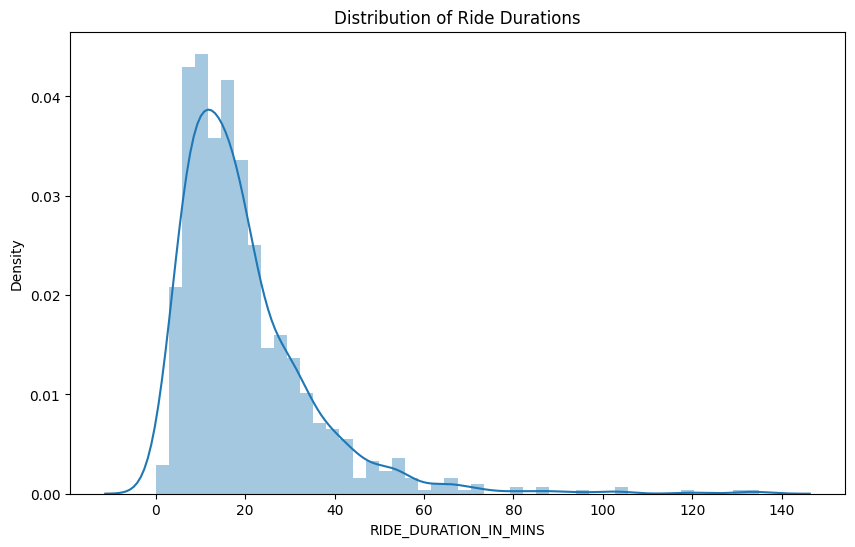

In [45]:

# Data distribution analysis
plt.figure(figsize=(10, 6))
sns.distplot(data['RIDE_DURATION_IN_MINS'])
plt.title('Distribution of Ride Durations')
plt.show()

## Frequency of Trip Purpose

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


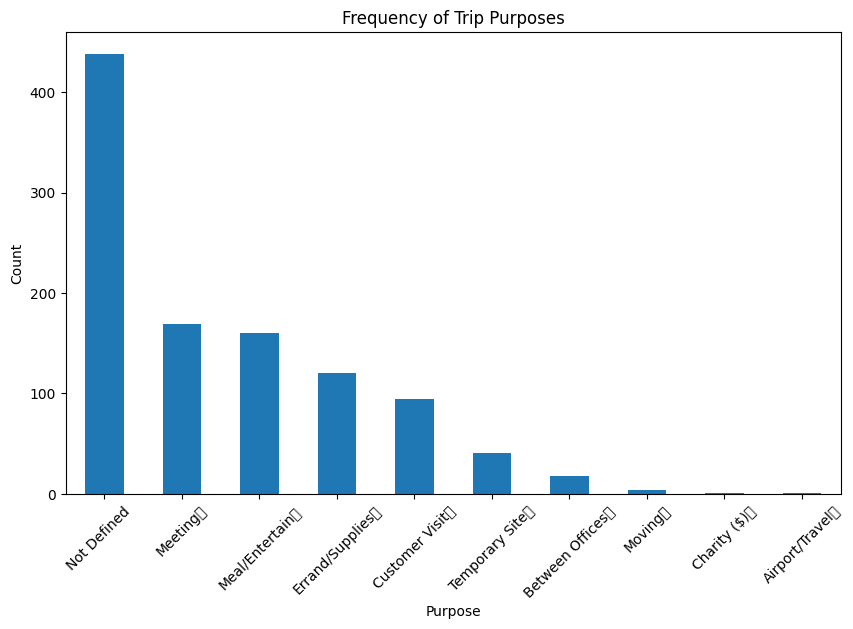

In [49]:
plt.figure(figsize=(10, 6))
data['PURPOSE'].value_counts().plot(kind='bar')
plt.title('Frequency of Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Relationship between Ride Duration and Distance

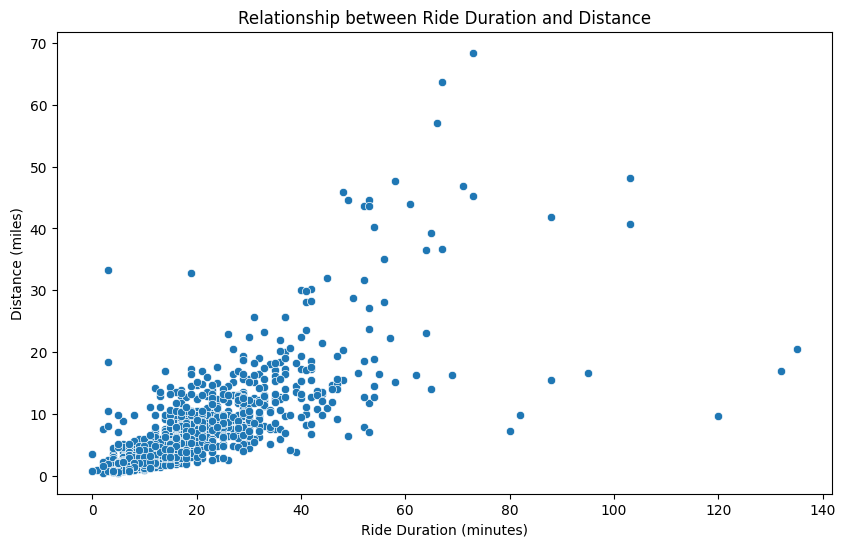

In [50]:
# Investigating trip distances
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RIDE_DURATION_IN_MINS'], y=data['MILES'])
plt.title('Relationship between Ride Duration and Distance')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.show()

# Key Trends

##Trend 1: Concentration of Trips in Specific Locations

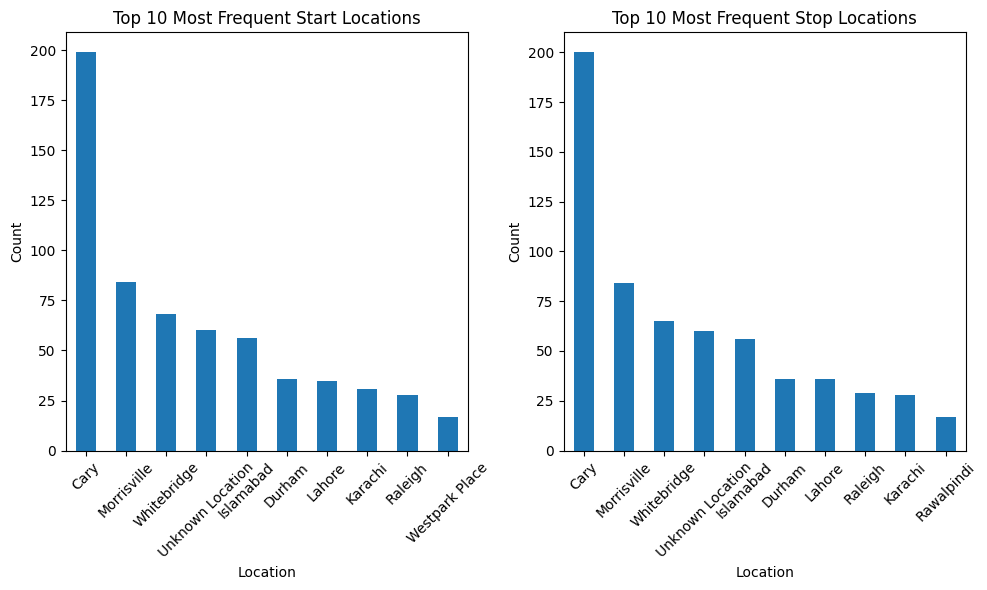

In [51]:
# Count the occurrences of start and stop locations
start_location_counts = data['START'].value_counts()
stop_location_counts = data['STOP'].value_counts()

# Visualize the top 10 most frequent start and stop locations
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
start_location_counts[:10].plot(kind='bar')
plt.title('Top 10 Most Frequent Start Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
stop_location_counts[:10].plot(kind='bar')
plt.title('Top 10 Most Frequent Stop Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Trend 2: Prevalence of Short-Duration Trips

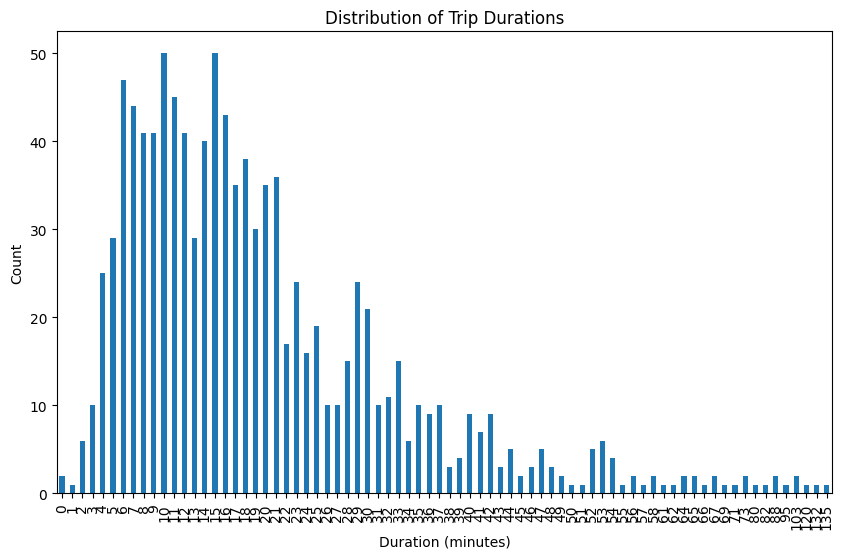

In [52]:
# Calculate the distribution of trip durations
duration_dist = data['RIDE_DURATION_IN_MINS'].value_counts().sort_index()

# Visualize the distribution of trip durations
plt.figure(figsize=(10, 6))
duration_dist.plot(kind='bar')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

##Trend 3: Variation in Trip Purposes

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


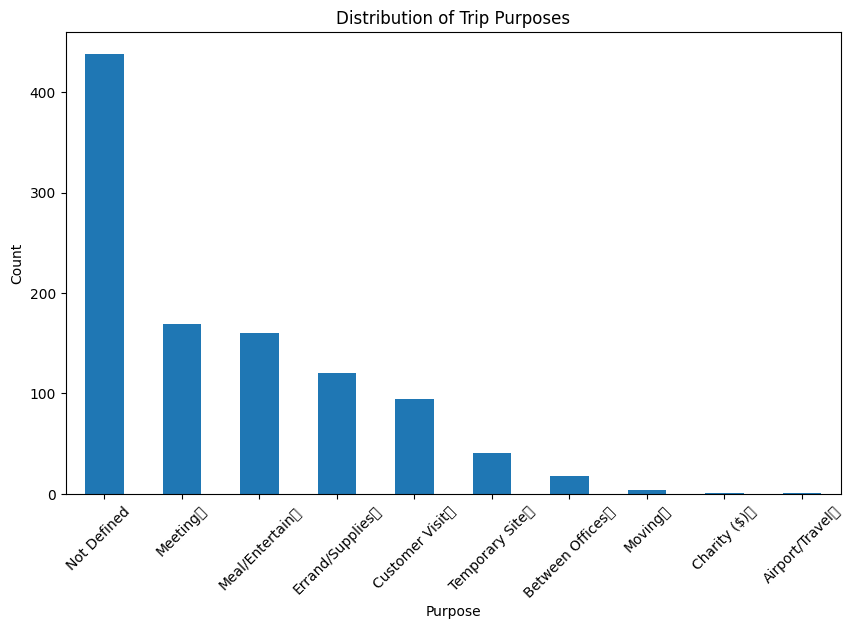

In [55]:
# Count the occurrences of each trip purpose
purpose_counts = data['PURPOSE'].value_counts()

# Visualize the distribution of trip purposes
plt.figure(figsize=(10, 6))
purpose_counts.plot(kind='bar')
plt.title('Distribution of Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Trend 4: Relationship between Trip Duration and Distance

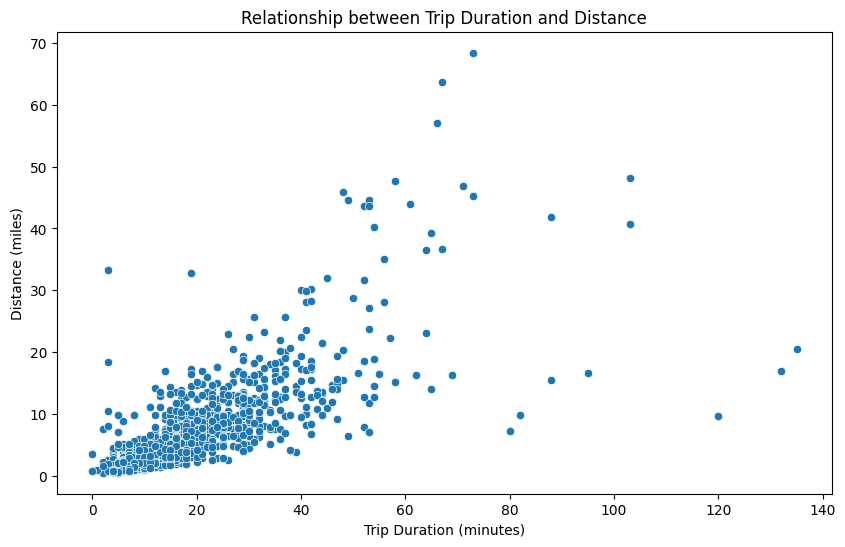

In [56]:
# Visualize the relationship between trip duration and distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RIDE_DURATION_IN_MINS'], y=data['MILES'])
plt.title('Relationship between Trip Duration and Distance')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.show()

##Trend 5: Distribution of Trip Start and End Times

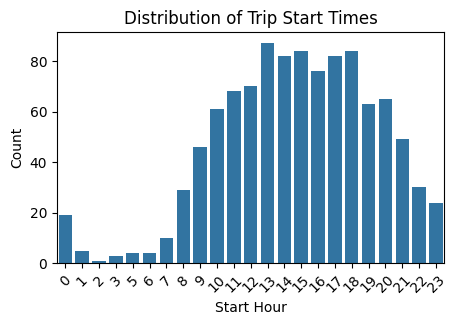

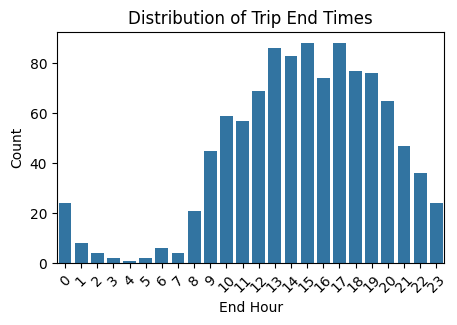

In [73]:
data['START_TIME'] = pd.to_datetime(data['START_TIME'])
data['END_TIME'] = pd.to_datetime(data['END_TIME'])


# Distribution of Trip Start and End Times
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['START_TIME'].dt.hour)
plt.title('Distribution of Trip Start Times')
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['END_TIME'].dt.hour)
plt.title('Distribution of Trip End Times')
plt.xlabel('End Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
